<a href="https://colab.research.google.com/github/FatimaPassos1986/TFM/blob/master/Skin_melanoma_cancer_detection_(Final_Project_TFM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skin Lesion Classification to Cancer Melanoma Detection
 
##Introdution:
El cáncer de piel es un importante problema de salud pública, con más de 5,000,000 casos recién diagnosticados en los Estados Unidos cada año. El melanoma es la forma más mortal de cáncer de piel, responsable de la gran mayoría de las muertes por cáncer de piel. En 2015, la incidencia global de melanoma se estimó en más de 350,000 casos, con casi 60,000 muertes. Aunque la mortalidad es significativa, cuando se detecta de forma temprana, la tasa de supervivencia es del 95%.
el melanoma es susceptible de detección temprana mediante inspección visual experta o mediante análisis de imagen. Dada la amplia disponibilidad de cámaras de alta resolución, los algoritmos que pueden mejorar nuestra capacidad para detectar y detectar lesiones problemáticas pueden ser de gran valor. Como resultado, muchos centros han comenzado sus propios esfuerzos de investigación en análisis automatizado. Sin embargo, aún no se ha implementado un esfuerzo centralizado, coordinado y comparativo entre las instituciones.

##Objective:
Predecir el tipo de enfermedad de piel en imágenes dermatoscópicas para la ayuda en el diagnostico temprano de los dermatologos a las siguientes posibles 7 categorías:

1.	Melanoma
2.	Melanocytic nevus
3.	Basal cell carcinoma
4.	Actinic keratosis / Bowen’s disease (intraepithelial carcinoma)
5.	Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis)
6.	Dermatofibroma
7.	Vascular lesion

##System Requirements:
En cuanto a las librerías usamos de numpy, TensorFlow (éste será el framework sobre el que correrá Keras), Keras y unas librerías necesarias Scikit Learn, Pandas, etc.
Adicionalmente utilizaremos Google Collaboratory con una GPU Tesla 80 y como leguaje de programación Python 3. 


## Input Data:
Los datos de entrada son imágenes de lesiones dermatoscópicas en formato JPEG. Todas las imágenes de las lesiones se nombran utilizando el esquema ISIC_.jpg, donde es un identificador único de 7 dígitos.
Las imágenes de las lesiones se adquirieron con una variedad de tipos de dermatoscopios, de todos los sitios anatómicos (excluyendo la mucosa y las uñas), de una muestra histórica de pacientes que se presentaron para la detección del cáncer de piel, de varias instituciones diferentes. 

La data del Training consiste en 10015 images y 1 ground truth en CSV (con 1 fila de encabezado y 10015 filas con los datos de respuesta).
Los datos de respuesta son conjuntos de clasificaciones binarias para cada uno de los 7 estados de enfermedad, lo que indica el diagnóstico de cada imagen de lesión de entrada. Todos los datos de respuesta están codificados dentro del archivo CSV, con cada respuesta de clasificación en una fila. Las columnas del archivo deben ser: imagen: un identificador de imagen de entrada del formulario ISIC_ MEL: "Melanoma" diagnóstico de confianza 
NV: "nevo melanocítico" diagnóstico de confianza 
BCC: "Carcinoma basocelular" diagnóstico de confianza 
AKIEC: "Queratosis actínica / enfermedad de Bowen (carcinoma intraepitelial)" diagnóstico de confianza 
BKL: “Queratosis benigna (lentigo solar, queratosis seborreica, queratosis similar al liquen plano)” diagnóstico de confianza 
DF: “Dermatofibroma” diagnóstico de confianza.

Adicionalmente se subirá una version 2 del archivo GT: "ISIC2018_Task3_Training_GroundTruth_prueba2.xls" (in excel format). Se han añadido 2 columnas (path to image, code).

## Uploading data

Para el experimento, usaremos el conjunto de datos libre provisto por el ISIC Institute (Fuente: https://challenge2018.isic-archive.com/task3/). 

Los datasets se subieron a Google Drive y de allí a Google Colab.

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

In [0]:
!pip install scikit-image
!pip install keras

In [0]:
!ls

adc.json  sample_data


In [0]:
##TASK 3_Uploading Images for Train and Ground Truth:

file_id = '1LSrdLKlX7xuFpfMt6jagmQR17iBGSijy'     
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("ISIC2018_Task3_Training_Input.zip")   ## 10015 imagenes .jpg

file_id = '1VaXSolajW_6flYdvy6OF7Bl8yG0_j-uG'                
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("ISIC2018_Task3_Training_GroundTruth.zip")

file_id = '1WTEsLRhiWSYk4VG5WCbZRKtT1ljJg4vl'                
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("ISIC2018_Task3_Training_GroundTruth_prueba2.xls")  


In [0]:
!ls

adc.json
ISIC2018_Task3_Training_GroundTruth_prueba2.xls
ISIC2018_Task3_Training_GroundTruth.zip
ISIC2018_Task3_Training_Input.zip
sample_data


## Data preparation:

To place the unzipped ISIC 2018 data, I created a folder "datasets/ISIC2018/data", including the following subfolders:

    ISIC2018_Task3_Training_GroundTruth
       ISIC2018_Task3_Training_GroundTruth_prueba2.xls 
    ISIC2018_Task3_Training_Input



In [0]:
mkdir datasets

In [0]:
!cd '/content/datasets/' && mkdir ISIC2018

In [0]:
!find '/content/datasets'

/content/datasets
/content/datasets/ISIC2018


In [0]:
import os, shutil
base_dir = "/content/datasets/ISIC2018"
data_dir = os.path.join(base_dir, "data")


In [0]:
os.mkdir(data_dir)

In [0]:
pwd

'/content'

In [0]:
!find '/content'

/content
/content/.config
/content/.config/logs
/content/.config/logs/2018.12.10
/content/.config/logs/2018.12.10/17.34.30.222646.log
/content/.config/logs/2018.12.10/17.34.33.479933.log
/content/.config/logs/2018.12.10/17.34.22.936104.log
/content/.config/logs/2018.12.10/17.34.19.161175.log
/content/.config/logs/2018.12.10/17.34.32.708689.log
/content/.config/logs/2018.12.18
/content/.config/logs/2018.12.18/07.32.05.040216.log
/content/.config/gce
/content/.config/config_sentinel
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/configurations
/content/.config/configurations/config_default
/content/.config/access_tokens.db
/content/.config/credentials.db
/content/.config/legacy_credentials
/content/.config/legacy_credentials/fkarinapassos@gmail.com
/content/.config/legacy_credentials/fkarinapassos@gmail.com/adc.json
/content/.config/legacy_credentials/fkarinapassos@gmail.com/.boto
/content/ISIC2018_Task3_Training_Input.zip
/content/adc.json
/cont

In [0]:
task3_img = 'ISIC2018_Task3_Training_Input'

task3_gt = 'ISIC2018_Task3_Training_GroundTruth_prueba2'  

In [0]:
task3_img_dir = os.path.join(data_dir, task3_img)
task3_gt_dir = os.path.join(data_dir, task3_gt)

In [0]:
##Moving and Unzipping the Images:

import shutil

shutil.move('ISIC2018_Task3_Training_Input.zip', '/content/datasets/ISIC2018/data/')
shutil.move('ISIC2018_Task3_Training_GroundTruth.zip', '/content/datasets/ISIC2018/data/')


'/content/datasets/ISIC2018/data/ISIC2018_Task3_Training_GroundTruth.zip'

In [0]:

!cd '/content/datasets/ISIC2018/data/' && unzip -q 'ISIC2018_Task3_Training_Input.zip'
!cd '/content/datasets/ISIC2018/data/' && unzip -q 'ISIC2018_Task3_Training_GroundTruth.zip'

!ls -hl '/content/datasets/ISIC2018/data/'

total 2.6G
drwxrwxr-x 2 root root 4.0K Apr  2  2018 ISIC2018_Task3_Training_GroundTruth
-rw-r--r-- 1 root root  36K Dec 18 07:33 ISIC2018_Task3_Training_GroundTruth.zip
drwxrwxr-x 2 root root 324K Apr  2  2018 ISIC2018_Task3_Training_Input
-rw-r--r-- 1 root root 2.6G Dec 18 07:33 ISIC2018_Task3_Training_Input.zip


In [0]:
import shutil
shutil.move('ISIC2018_Task3_Training_GroundTruth_prueba2.xls', '/content/datasets/ISIC2018/data/ISIC2018_Task3_Training_GroundTruth/')

'/content/datasets/ISIC2018/data/ISIC2018_Task3_Training_GroundTruth/ISIC2018_Task3_Training_GroundTruth_prueba2.xls'

In [0]:
!find '/content'

/content
/content/.config
/content/.config/logs
/content/.config/logs/2018.12.10
/content/.config/logs/2018.12.10/17.34.30.222646.log
/content/.config/logs/2018.12.10/17.34.33.479933.log
/content/.config/logs/2018.12.10/17.34.22.936104.log
/content/.config/logs/2018.12.10/17.34.19.161175.log
/content/.config/logs/2018.12.10/17.34.32.708689.log
/content/.config/logs/2018.12.18
/content/.config/logs/2018.12.18/07.32.05.040216.log
/content/.config/gce
/content/.config/config_sentinel
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/configurations
/content/.config/configurations/config_default
/content/.config/access_tokens.db
/content/.config/credentials.db
/content/.config/legacy_credentials
/content/.config/legacy_credentials/fkarinapassos@gmail.com
/content/.config/legacy_credentials/fkarinapassos@gmail.com/adc.json
/content/.config/legacy_credentials/fkarinapassos@gmail.com/.boto
/content/adc.json
/content/datasets
/content/datasets/ISIC2018
/co

##Importing necessary libraries and preparing the data:

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import shutil, glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from tqdm import tqdm
from skimage import io
from skimage import transform

from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K


Using TensorFlow backend.


In [0]:
# This dictionary is useful for displaying more human-friendly labels later on

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [0]:
!pip install xlrd

In [0]:
# Read the xls file

file = pd.read_excel('/content/datasets/ISIC2018/data/ISIC2018_Task3_Training_GroundTruth/ISIC2018_Task3_Training_GroundTruth_prueba2.xls')
tile_df = pd.DataFrame(file)
tile_df.head(10)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,code,path
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Melanocytic nevus,/content/datasets/ISIC2018/data/ISIC2018_Task3...
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Melanocytic nevus,/content/datasets/ISIC2018/data/ISIC2018_Task3...
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Melanocytic nevus,/content/datasets/ISIC2018/data/ISIC2018_Task3...
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Melanocytic nevus,/content/datasets/ISIC2018/data/ISIC2018_Task3...
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Melanoma,/content/datasets/ISIC2018/data/ISIC2018_Task3...
5,ISIC_0024311,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Melanocytic nevus,/content/datasets/ISIC2018/data/ISIC2018_Task3...
6,ISIC_0024312,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Benign keratosis,/content/datasets/ISIC2018/data/ISIC2018_Task3...
7,ISIC_0024313,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Melanoma,/content/datasets/ISIC2018/data/ISIC2018_Task3...
8,ISIC_0024314,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Melanocytic nevus,/content/datasets/ISIC2018/data/ISIC2018_Task3...
9,ISIC_0024315,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Melanoma,/content/datasets/ISIC2018/data/ISIC2018_Task3...


In [0]:
tile_df['cell_type_idx'] = pd.Categorical(tile_df['code']).codes

tile_df.sample(10)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,code,path,cell_type_idx,image_resized,Blue_mean,Green_mean,Red_mean,Gray_mean
8738,ISIC_0033044,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Melanocytic nevus,/content/datasets/ISIC2018/data/ISIC2018_Task3...,4,"[[[132, 120, 132], [140, 127, 144], [141, 130,...",1.017569,0.948082,1.034349,160.081867
7825,ISIC_0032131,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Melanocytic nevus,/content/datasets/ISIC2018/data/ISIC2018_Task3...,4,"[[[224, 129, 135], [224, 131, 142], [221, 129,...",0.756637,0.768752,1.474611,138.664800
8979,ISIC_0033285,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Melanocytic nevus,/content/datasets/ISIC2018/data/ISIC2018_Task3...,4,"[[[81, 69, 81], [99, 83, 94], [104, 93, 101], ...",1.011520,0.948049,1.040431,148.593378
2151,ISIC_0026457,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Actinic keratosis,/content/datasets/ISIC2018/data/ISIC2018_Task3...,0,"[[[109, 77, 64], [118, 85, 80], [120, 87, 80],...",0.937132,0.908902,1.153966,150.264311
9734,ISIC_0034040,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Benign keratosis,/content/datasets/ISIC2018/data/ISIC2018_Task3...,2,"[[[105, 92, 110], [124, 102, 125], [132, 109, ...",0.993953,0.913188,1.092859,158.522489
9438,ISIC_0033744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Benign keratosis,/content/datasets/ISIC2018/data/ISIC2018_Task3...,2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0.920726,0.880388,1.198885,128.210533
7637,ISIC_0031943,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Basal cell carcinoma,/content/datasets/ISIC2018/data/ISIC2018_Task3...,1,"[[[145, 116, 100], [167, 135, 122], [176, 144,...",0.868455,0.909526,1.222019,165.646222
9984,ISIC_0034290,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Melanocytic nevus,/content/datasets/ISIC2018/data/ISIC2018_Task3...,4,"[[[132, 100, 137], [136, 102, 137], [134, 103,...",1.030907,0.877719,1.091375,164.370800
435,ISIC_0024741,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Benign keratosis,/content/datasets/ISIC2018/data/ISIC2018_Task3...,2,"[[[120, 109, 117], [120, 109, 117], [121, 110,...",1.011306,0.931085,1.057608,133.316533
3480,ISIC_0027786,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Basal cell carcinoma,/content/datasets/ISIC2018/data/ISIC2018_Task3...,1,"[[[232, 193, 212], [236, 175, 180], [230, 165,...",0.897810,0.856336,1.245854,184.306089



## Exploratory Data Analysis of Ground Truth Data


In [0]:
# Get general statistics for the dataset

tile_df.describe(exclude=[np.number])

,image,code,path
count,10015,10015,10015
unique,10015,7,10015
top,ISIC_0027727,Melanocytic nevus,/content/datasets/ISIC2018/data/ISIC2018_Task3...
freq,1,6705,1


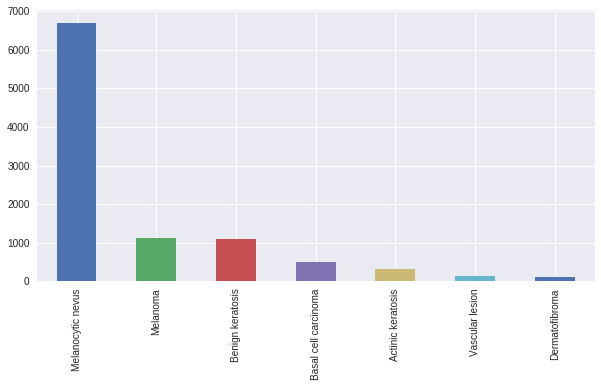

In [0]:
# Let's see the distribution of different cell types

fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
tile_df['code'].value_counts().plot(kind='bar', ax=ax1)

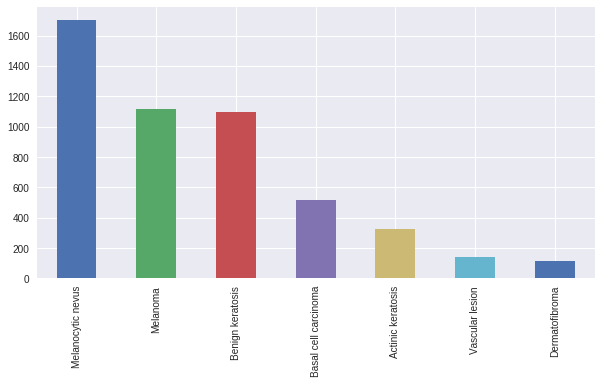

In [0]:
# Too many melanocytic nevi - let's balance it a bit

tile_df = tile_df.drop(tile_df[tile_df.code == 'Melanocytic nevus'].iloc[:5000].index)

fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
tile_df['code'].value_counts().plot(kind='bar', ax=ax1)

## Import and resize images


In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil

In [0]:
# Load in all of the images into memory - this will take a while.  
# We also do a resize step because the original dimensions of 450 * 600 * 3 was too much for TensorFlow

tile_df['image_resized'] = tile_df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))


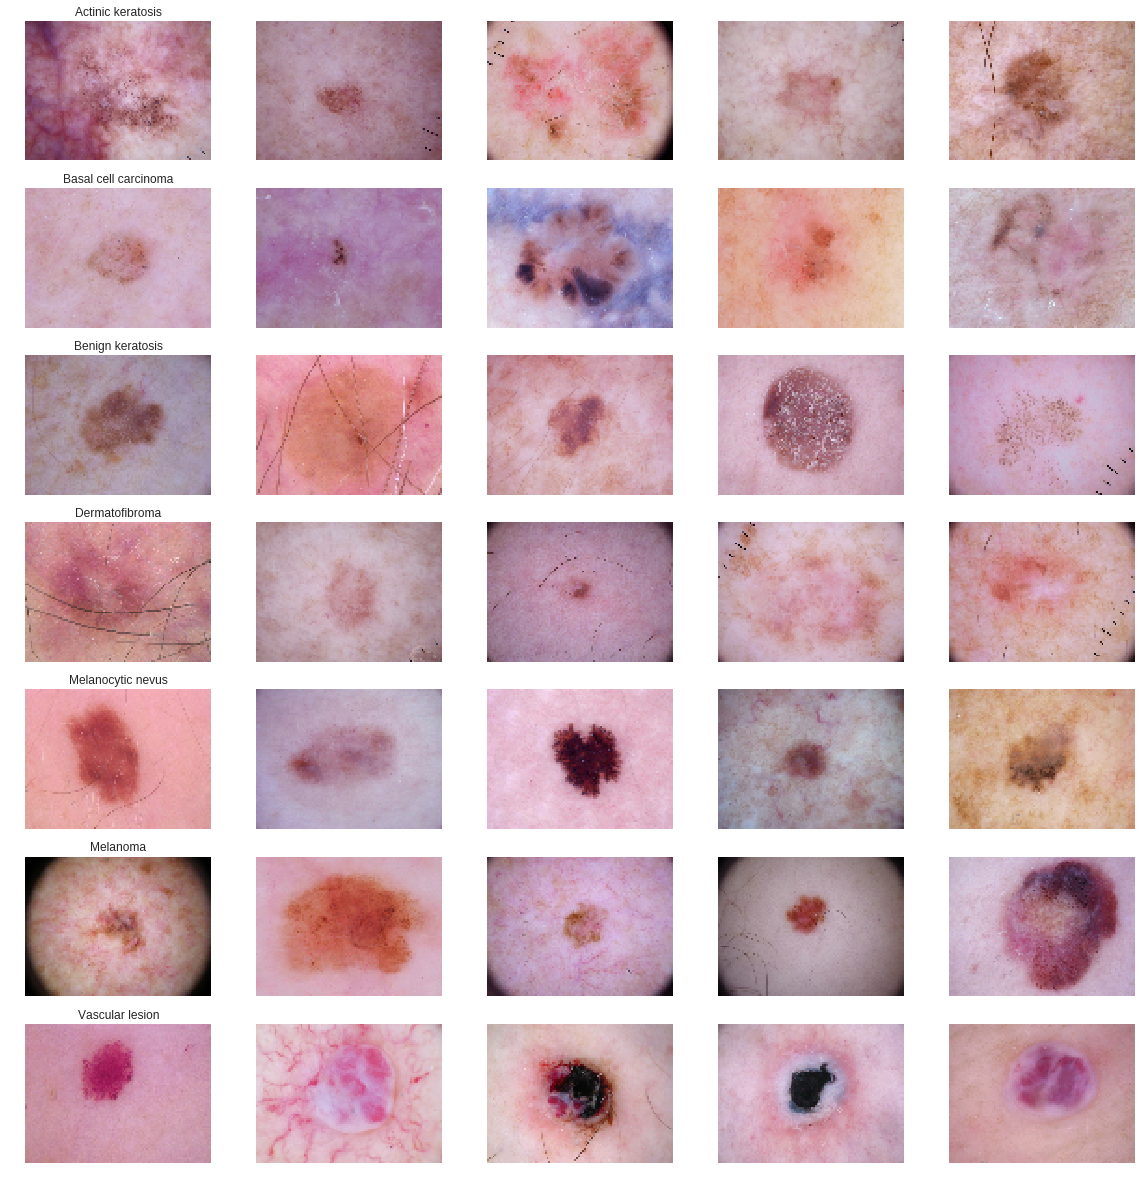

In [0]:
# verifiying if the images are resized:

n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         tile_df.sort_values(['code']).groupby('code')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image_resized'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [0]:
# See the image size distribution - should just return one row (all images are uniform)
tile_df['image_resized'].map(lambda x: x.shape).value_counts()

(75, 100, 3)    5015
Name: image_resized, dtype: int64

###Color channel analysis

How do the normalized color samples vary across different types of skin diseases?


In [0]:
rgb_info_df = tile_df.apply(lambda x: pd.Series({'{}_mean'.format(k): v for k, v in 
                                  zip(['Red', 'Green', 'Blue'], 
                                      np.mean(x['image_resized'], (0, 1)))}),1)
gray_col_vec = rgb_info_df.apply(lambda x: np.mean(x), 1)
for c_col in rgb_info_df.columns:
    rgb_info_df[c_col] = rgb_info_df[c_col]/gray_col_vec
rgb_info_df['Gray_mean'] = gray_col_vec
rgb_info_df.sample(10)


,Blue_mean,Green_mean,Red_mean,Gray_mean
4911,0.962875,0.948420,1.088704,160.634133
1709,0.998791,0.916776,1.084433,149.815333
8368,0.971629,0.801117,1.227254,141.322889
9482,0.927350,0.932387,1.140264,117.336844
3146,0.906294,0.871716,1.221990,185.368711
642,0.908249,0.907574,1.184177,186.063733
8739,0.961045,0.909109,1.129846,146.608356
9536,1.024132,0.901834,1.074034,129.477733
9716,0.903982,0.836367,1.259651,159.377822
9213,1.037385,0.846559,1.116056,142.800356


In [0]:
for c_col in rgb_info_df.columns:
    tile_df[c_col] = rgb_info_df[c_col].values

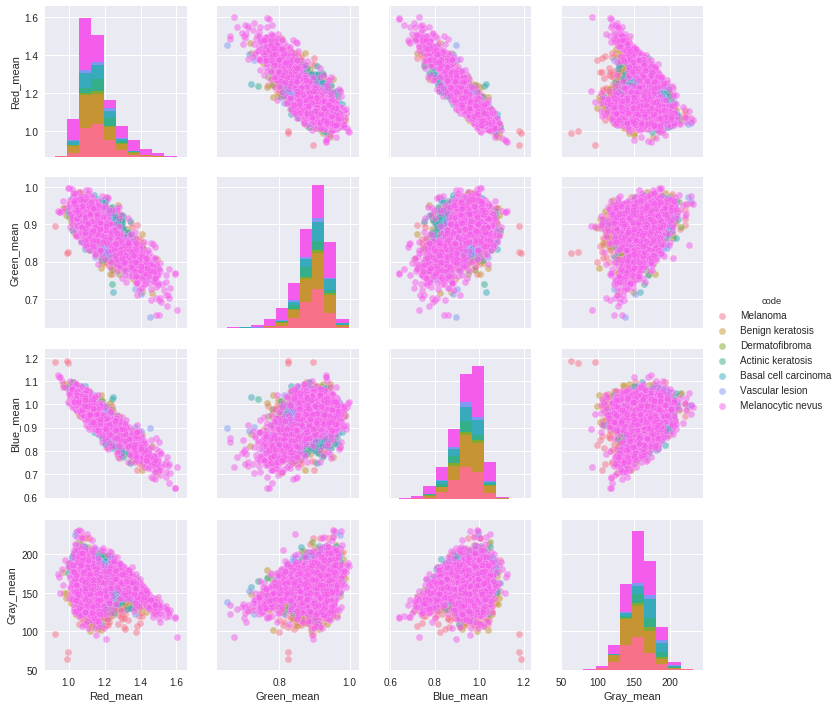

In [0]:
sns.pairplot(tile_df[['Red_mean', 'Green_mean', 'Blue_mean', 'Gray_mean', 'code']], 
             hue='code', plot_kws = {'alpha': 0.5})


## Deep Convolutional Classifier

**Create a new training and test sets:**
El x_train y x_test de las lineas 4 y 5 del parrafo siguiente corresponden a los conjuntos de datos con lás imágenes de entrenamiento y validación respectivamente, mientras que y_train y y_test son los datasets con las etiquetas (0s ó 1s).


In [0]:
y = tile_df.cell_type_idx

from sklearn.model_selection import train_test_split
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(tile_df, y, test_size=0.25)

x_train = np.asarray(x_train_o['image_resized'].tolist())
x_test = np.asarray(x_test_o['image_resized'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

**We are going to build a multi-class classifier using a deep convolutional network architecture:**

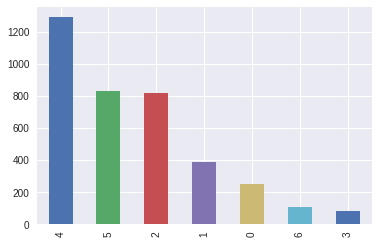

In [0]:
y_train_o.value_counts().plot(kind='bar')


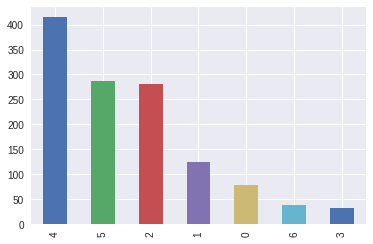

In [0]:
y_test_o.value_counts().plot(kind='bar')


**Define our deep convolutional network architecture:**
Con la instrucción Conv2D utilizaremos una red convolutiva que introduce una capa convolucional y para la capa de pooling hemos usado MaxPooling. Luego añadimos la instrucción Flatten que convierte los elementos de la matriz de imagenes de entrada en un array plano. Y después, con la instrucción Dense añadimos una capa oculta (hidden layer) de la red neuronal con 128 nodos. Para la función de activación usaremos en las capas ocultas ReLu y para la capa de salida SoftMax.

Una vez definido el modelo, lo compilamos especificando la función de optimización, la de coste o pérdida y las métricas que usaremos. En este caso, usaremos la función de optimización de Adadelta (Adam Optimizer), la función de pérdida de entropía cruzada (categorical cross entropy) y, para las métricas el accuracy (o tasa de acierto). Todas éstas funciones ya vienen preimplementadas en Keras.

In [0]:
input_shape = (75, 100, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))  #podriamos añadir más capas con diferente cantidad de nodos (para este caso usamos 128), siempre en orden decreciente porque la cantidad de nodos de la capa anterior no debe ser menor que la capa siguiente.
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [0]:
model.layers

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 73, 98, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 71, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 48, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 35, 48, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 107520)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               13762688  
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

Para ser un modelo simple de red convolucional, podemos ver que tiene que entrenar más de 3 millones de parámetros. Para entrenar redes muy complejas se necesitaría entrenar de esta forma grandes cantidades de parámetros.

Ahora sólo queda entrenar, y para ello, haremos lo siguiente:

**Training the model:**
Indicamos a Keras que queremos usar para entrenar el dataset imágenes de entrenamiento (reducidas de tamaño a 100x75) con el array de etiquetas one-hot-encoding. Usaremos bloques de 32 (para reducir la necesidad de memoria) y le daremos 12 vueltas completas (o epochs). 
Usaremos los datos para validar el xtest e ytest, e iremos viendo el proceso de entrenamiento a continuación hasta terminar. El resultado del entrenamiento se guardará en la variable "history", de la cual, extraeremos el histórico de los datos del entrenamiento:

In [0]:
batch_size = 32 
epochs = 12

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 3761 samples, validate on 1254 samples
Epoch 1/12
3761/3761 [==============================] - 8s 2ms/step - loss: 12.6082 - acc: 0.2178 - val_loss: 10.1146 - val_acc: 0.2719
Epoch 2/12
3761/3761 [==============================] - 7s 2ms/step - loss: 12.5911 - acc: 0.2188 - val_loss: 10.1146 - val_acc: 0.2719
Epoch 3/12
3761/3761 [==============================] - 7s 2ms/step - loss: 12.6125 - acc: 0.2175 - val_loss: 10.1146 - val_acc: 0.2719
Epoch 4/12
3761/3761 [==============================] - 7s 2ms/step - loss: 12.6125 - acc: 0.2175 - val_loss: 10.1146 - val_acc: 0.2719
Epoch 5/12
3761/3761 [==============================] - 7s 2ms/step - loss: 12.6125 - acc: 0.2175 - val_loss: 10.1146 - val_acc: 0.2719
Epoch 6/12
3761/3761 [==============================] - 7s 2ms/step - loss: 12.6082 - acc: 0.2178 - val_loss: 10.1146 - val_acc: 0.2719
Epoch 7/12
3761/3761 [==============================] - 7s 2ms/step - loss: 12.6082 - acc: 0.2178 - val_loss: 10.1146 - val_acc: 0.2719



## Model Validation

Graficamos las curvas de Loss y accuracy para el training y el test set.


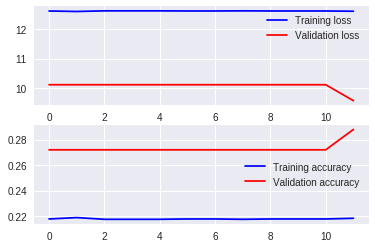

In [0]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**we experiment with different # epochs but the best values for loss and accuracy were obtained for epochs =12. El modelo no generaliza muy bien.** 

##Confusion matrix:

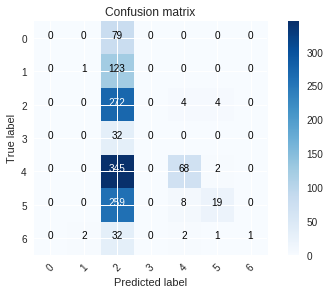

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

In [0]:
y_true

array([4, 5, 5, ..., 4, 2, 0])

In [0]:
y_pred_classes

array([2, 2, 2, ..., 2, 2, 2])

In [0]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Mostramos las métricas obtenidas:**

In [0]:
from sklearn.metrics import classification_report

cm_report = classification_report(y_true, y_pred_classes)  
print(cm_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.33      0.01      0.02       124
           2       0.24      0.97      0.38       280
           3       0.00      0.00      0.00        32
           4       0.83      0.16      0.27       415
           5       0.73      0.07      0.12       286
           6       1.00      0.03      0.05        38

   micro avg       0.29      0.29      0.29      1254
   macro avg       0.45      0.18      0.12      1254
weighted avg       0.56      0.29      0.21      1254



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##ROC Curve (tasas de verdaderos positivos y falsos positivos)

La curva ROC generalmente es usada en los clasificadores binarios por ser una buena herramienta para enfrentar la tasa de positivos reales contra los falsos positivos.

En nuestro caso vamos a codificar la curva ROC para una clasificación multiclase. (Fuente: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

**Notas**: La macro-average calculará la métrica de forma independiente para cada clase y luego tomará el promedio (por lo tanto, tratará a todas las clases por igual), mientras que micro-average agregará las contribuciones de todas las clases para calcular la métrica promedio. En una configuración de clasificación de clases múltiples , es preferible usar el micro-average si se sospecha que puede haber un desequilibrio de clases (como es nuestro caso).

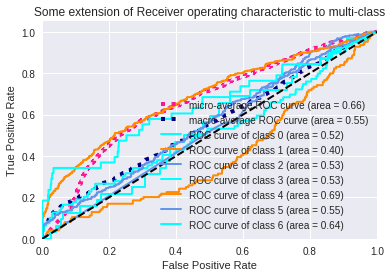

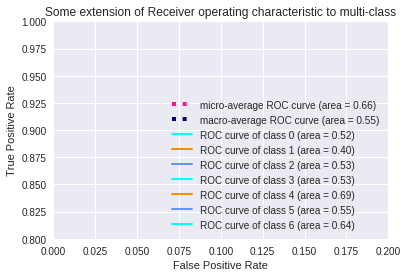

In [0]:
from sklearn.datasets import make_classification  
from sklearn.preprocessing import label_binarize  
from scipy import interp  
from itertools import cycle

n_classes = 7

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()  
tpr = dict()  
roc_auc = dict()  
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)  
for i in range(n_classes):  
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr  
tpr["macro"] = mean_tpr  
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(n_classes), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)  
plt.xlim(0, 0.2)  
plt.ylim(0.8, 1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(7), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()  

###revisando algunos de los resultados:

In [0]:
x_train = np.asarray(x_train_o['image_resized'].tolist())
x_train

array([[[[160, 140, 149],
         [162, 143, 149],
         [162, 142, 151],
         ...,
         [167, 146, 153],
         [161, 141, 150],
         [165, 142, 152]],

        [[164, 138, 151],
         [164, 141, 151],
         [160, 141, 147],
         ...,
         [165, 144, 153],
         [163, 142, 147],
         [163, 142, 151]],

        [[162, 142, 151],
         [164, 142, 154],
         [162, 142, 151],
         ...,
         [164, 141, 147],
         [162, 141, 150],
         [162, 139, 149]],

        ...,

        [[159, 136, 146],
         [159, 138, 147],
         [159, 140, 146],
         ...,
         [166, 146, 148],
         [162, 143, 147],
         [161, 141, 150]],

        [[157, 137, 146],
         [158, 134, 147],
         [159, 138, 145],
         ...,
         [164, 141, 151],
         [163, 142, 151],
         [163, 137, 146]],

        [[156, 133, 139],
         [158, 133, 139],
         [158, 138, 147],
         ...,
         [165, 139, 150],
        

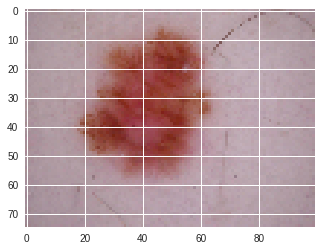

class for image 1: 4
predicted:         2


In [0]:
imgplot = plt.imshow(x_train[0])  
plt.show()  
print('class for image 1: ' + str(y_true[0]))  
print('predicted:         ' + str(y_pred_classes[0]))  

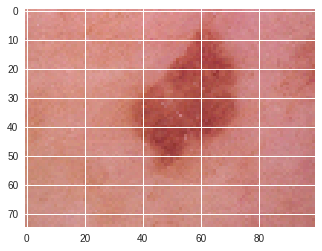

class for image 3: 5
predicted:         2


In [0]:
imgplot = plt.imshow(x_train[3])  
plt.show()  
print('class for image 3: ' + str(y_true[3]))  
print('predicted:         ' + str(y_pred_classes[3]))  

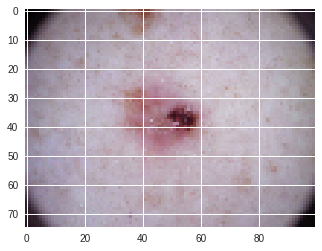

class for image 9: 4
predicted:         2


In [0]:
imgplot = plt.imshow(x_train[9])  
plt.show()  
print('class for image 9: ' + str(y_true[9]))  
print('predicted:         ' + str(y_pred_classes[9]))

##Conclusion:

Aunque no está mal para 12 epochs, vemos que las gráficas no van a mejorar mucho más, pues comienzan a ponerse horizontales, lo que indica que aumentar mucho más las vueltas de entrenamiento no van a mejorar el aprendizaje. Si bien la curva ROC da una buena tasa de positivos reales contra falsos positivos (es decir, cuando especifica una clase, no suele dar un falso positivo), el nivel de acierto es muy bajo para las métricas accuracy (55%), recall (43%) y precission (56%).

Las clases que mayor tasa de aciertos obtuvieron corresponden a la 2 (Benign Keratosis) y la 4 (Melanocytic nevus), que a pesar de no obtener las tasas precision más elevadas, la tasa de aciertos es elevada. También es cierto que la clase con mayor peso es la 2, con lo cual el sistema aprendería mejor para este tipo de enfermedad.

Para la clase 5 (Melanoma), lo resultados de precision son aceptables pero deben mejorarse ya que en en el campo de la medicina es de vital importancia acertar con el diagnostico (y en el peor de los escenarios dar un diagnostico para descarte de cancer, que un diagnotico errado que al final si fuera cancer), por tanto en nuestro proyecto es mejor obtener mas recall que precision.




## Further work:
Se propone como trabajo futuro extender la fase de entrenamiento, usando una red convnet pre-entrenada (como por ejemplo Inception_v3 o Resnet50) y métodos de normalización para mejorar el problema del desequilibrio entre clases y asi mejorar el rendimiento de nuestro sistema y aumentar la precisión. Para ello lo idóneo deberá ser utilizar recursos de GPU suficientes para evitar el colapso de la memoria durante el entrenamiento.